In [0]:
import os
import time
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import graphviz as gviz
import math
from sklearn import tree
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

global Variables


In [0]:
negatively_keyed = ['EXT2', 'EXT4', 'EXT6', 'EXT8', 'EXT10',
                    'EST2', 'EST4', 'AGR1', 'AGR3', 'AGR5',
                    'AGR7', 'CSN2', 'CSN4', 'CSN6', 'CSN8', 
                    'OPN2', 'OPN4', 'OPN6']

NAME = "big5-model-{}".format(int(time.time()))

Functions

In [0]:
def loadDataset():
    df = pd.read_csv("/content/drive/My Drive/AI Project/data-final.csv", sep='\t')
    df = df.dropna()
    df
    df1 = df.iloc[:,0:50]
    df1.loc[:, negatively_keyed] = 6 - df.loc[:, negatively_keyed]
    df1 = df1.div(5)  # normalizing dataext = df1.iloc[:,0:10]
    ext = df1.iloc[:,0:10]
    extlabel = ext.mean(axis = 1)
    est = df1.iloc[:,10:20]
    estlabel = est.mean(axis = 1)
    agr = df1.iloc[:,20:30]
    agrlabel = agr.mean(axis = 1)
    csn = df1.iloc[:,30:40]
    csnlabel = csn.mean(axis = 1)
    opn = df1.iloc[:,40:50]
    opnlabel = opn.mean(axis = 1)    

    #print(extlabel,estlabel,agrlabel,csnlabel,opnlabel)  
    labels = pd.DataFrame({"AEXT":extlabel,"AEST":estlabel,"AAGR":agrlabel,"ACSN":csnlabel,"AOPN":opnlabel})
    
    # shuffle
    idx = np.random.permutation(df1.index)
    df1 = df1.reindex(idx)
    labels=labels.reindex(idx)
    trainSetX = df1.iloc[0:int(0.95*df1.shape[0]),:]
    testSetX = df1.iloc[int(0.95*df1.shape[0]):,:]
    trainSetY = labels.iloc[0:int(0.95*labels.shape[0]),:]
    testSetY = labels.iloc[int(0.95*labels.shape[0]):,:]
    return trainSetX.to_numpy(), trainSetY.to_numpy(), testSetX.to_numpy(), testSetY.to_numpy()

NN model with two layers

In [0]:
def twoLayerNN():
    Epochs = 10
    batchSize = 32
    X_train, Y_train, X_Test, Y_test = loadDataset()
   
    model = Sequential(name = NAME)
    model.add(Dense(64, activation="relu", input_shape=(X_train.shape[1],)))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(5,  activation="sigmoid"))
    model.summary()


    model.compile(optimizer= tf.keras.optimizers.Adam(lr=0.001), loss='binary_crossentropy', metrics=['categorical_accuracy'])
    history = model.fit(X_train, Y_train, validation_split=0.2, epochs=Epochs, batch_size= batchSize, verbose=1)
    model.evaluate(X_Test,Y_test,batch_size=1000, verbose=1)
    model.save("two_bigfiveperonality_{}.model".format(time.time()))

    # Plot training & validation accuracy values
    plt.plot(history.history['categorical_accuracy'])
    plt.plot(history.history['val_categorical_accuracy'])
    plt.title('2 layer nn accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.savefig("two_layer_accuracy_plot_{}.png".format(time.time()))

    # Plot training & validation loss values
    plt.clf()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('2 layer nn loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.savefig("two_loss_plot_{}.png".format(time.time()))

NN model with one layer

In [0]:
def oneLayerNN():
    Epochs = 100
    batchSize = 256
    X_train, Y_train, X_Test, Y_test = loadDataset()
   
    model = Sequential(name = NAME)
    model.add(Dense(64, activation="relu", input_shape=(X_train.shape[1],)))
    model.add(Dense(5,  activation="sigmoid"))
    model.summary()
    tf.keras.utils.plot_model(model, to_file='oneLayerNN.png', show_shapes=True)


    model.compile(optimizer= tf.keras.optimizers.SGD(lr=0.001), loss='binary_crossentropy', metrics=['categorical_accuracy'])
    history = model.fit(X_train, Y_train, validation_split=0.2, epochs=Epochs, batch_size= batchSize, verbose=1)
    model.evaluate(X_Test,Y_test,batch_size=1000, verbose=1)
    model.save("oneLayer_bigfiveperonality_{}.model".format(time.time()))

    # Plot training & validation accuracy values
    plt.plot(history.history['categorical_accuracy'])
    plt.plot(history.history['val_categorical_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.savefig("oneLayer_accuracy_plot_{}.png".format(time.time()))

    # Plot training & validation loss values
    plt.clf()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.savefig("oneLayer_loss_plot_{}.png".format(time.time()))

Model using one layer regression

In [0]:
def regressionNN():
    Epochs = 10
    batchSize = 64
    X_train, Y_train, X_test, Y_test = loadDataset()

    regression = Sequential(name="Big5-regression")
    regression.add(Dense(64, activation ='relu', input_shape=(X_train.shape[1],)))
    regression.add(Dense(5))
    regression.summary()
    tf.keras.utils.plot_model(regression, to_file="regression.png", show_shapes=True)

    regression.compile(optimizer= tf.keras.optimizers.Adam(lr=0.001), loss='mse', metrics=['accuracy'])
    history = regression.fit(X_train, Y_train, validation_split=0.2, epochs=Epochs, batch_size= batchSize, verbose=1)
    regression.evaluate(X_test, Y_test, batch_size=128, verbose=1)
    regression.save("regression_{}".format(time.time()))

    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('regression accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.savefig("regression_accuracy_plot_{}.png".format(time.time()))

    # Plot training & validation loss values
    plot.clf()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('regression loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.savefig("regression_loss_plot_{}.png".format(time.time()))

Decision Tree Scorer

In [0]:
def ScoreTree(ActualLabels, PredictedLabels):

  #            Multi Tree Code

  Score = 0
  for x in range(0,ActualLabels.shape[0]-1):
    if(math.isclose(ActualLabels[x],PredictedLabels[x])):
      Score += 1

  return Score
  
  #            Single Tree Code

  # ScorePerTrait = np.zeros(5)
  # TotalScore: double = 0

  # for x in range(0,ActualLabels.shape[0]):
  #   for y in range(0,ActualLabels.shape[1]):
  #       if(math.isclose(ActualLabels[x][y],PredictedLabels[x][y])):
  #         ScorePerTrait[y] += 1
  #         TotalScore += 1

  # AccuracyPercentage = ((TotalScore/(ActualLabels.shape[0]*ActualLabels.shape[1]))*100)
  # for x in range(0,ScorePerTrait.shape[0]):
  #   ScorePerTrait[x] = ((ScorePerTrait[x]/ActualLabels.shape[0]) * 100)

  # return AccuracyPercentage, ScorePerTrait

Decision Tree

In [0]:
def DecisionTree(Depth):
  TrainingData, TrainingLabels, TestData, TestLabels = loadDataset() 
  
  TrainingDataExt, TrainingDataEst, TrainingDataAgr, TrainingDataCsn, TrainingDataOpn = np.hsplit(TrainingData,5)
  TrainingLabelsExt, TrainingLabelsEst, TrainingLabelsAgr, TrainingLabelsCsn, TrainingLabelsOpn = np.hsplit(TrainingLabels,5)
  TestDataExt, TestDataEst, TestDataAgr, TestDataCsn, TestDataOpn = np.hsplit(TestData,5)
  TestLabelsExt, TestLabelsEst, TestLabelsAgr, TestLabelsCsn, TestLabelsOpn = np.hsplit(TestLabels,5)
  
  
  
  #Extraversion
  RegressorExt = tree.DecisionTreeRegressor(max_depth = Depth)
  RegressorExt = RegressorExt.fit(TrainingDataExt, TrainingLabelsExt)
  #print("Extraversion Tree Depth = " + str(RegressorExt.get_depth()))

  PredictionExt = RegressorExt.predict(TestDataExt)
  ExtScore = ScoreTree(TestLabelsExt, PredictionExt)
  #print(ExtScore)
  ExtPercent = ((ExtScore/TestLabelsExt.shape[0]) *100)
  #print(ExtPercent)

  #Neuroticism
  RegressorEst = tree.DecisionTreeRegressor(max_depth = Depth)
  RegressorEst = RegressorEst.fit(TrainingDataEst, TrainingLabelsEst)
  #print("Neuroticism Tree Depth = " + str(RegressorEst.get_depth()))

  PredictionEst = RegressorEst.predict(TestDataEst)
  EstScore = ScoreTree(TestLabelsEst, PredictionEst)
  #print(EstScore)
  EstPercent = ((EstScore/TestLabelsEst.shape[0]) *100)
  #print(EstPercent)
  

  #Agreeableness
  RegressorAgr = tree.DecisionTreeRegressor(max_depth = Depth)
  RegressorAgr = RegressorAgr.fit(TrainingDataAgr, TrainingLabelsAgr)
  #print("Agreeableness Tree Depth = " + str(RegressorAgr.get_depth()))

  PredictionAgr = RegressorAgr.predict(TestDataAgr)
  AgrScore = ScoreTree(TestLabelsAgr, PredictionAgr)
  #print(AgrScore)
  AgrPercent = ((AgrScore/TestLabelsAgr.shape[0]) *100)
  #print(AgrPercent)

  #Conscientiosness
  RegressorCsn = tree.DecisionTreeRegressor(max_depth = Depth)
  RegressorCsn = RegressorCsn.fit(TrainingDataCsn, TrainingLabelsCsn)
  #print("Csn Tree Depth = " + str(RegressorCsn.get_depth()))

  PredictionCsn = RegressorCsn.predict(TestDataCsn)
  CsnScore = ScoreTree(TestLabelsCsn, PredictionCsn)
  #print(CsnScore)
  CsnPercent = ((CsnScore/TestLabelsCsn.shape[0]) *100)
  #print(CsnPercent)


  #Openness
  RegressorOpn = tree.DecisionTreeRegressor(max_depth = Depth)
  RegressorOpn = RegressorOpn.fit(TrainingDataOpn, TrainingLabelsOpn)
  #print("Openness Tree Depth = " + str(RegressorOpn.get_depth()))

  PredictionOpn = RegressorOpn.predict(TestDataOpn)
  OpnScore = ScoreTree(TestLabelsOpn, PredictionOpn)
  #print(OpnScore)
  OpnPercent = ((OpnScore/TestLabelsOpn.shape[0]) *100)
  #print(OpnPercent)


  TotalScore = ExtScore + EstScore + AgrScore + CsnScore + OpnScore
  AccuracyPercentage = ( (TotalScore / (TestLabels.shape[0]*TestLabels.shape[1]) ) *100)
  #print("Total Accuracy: " + str(AccuracyPercentage))

  # Regressor = tree.DecisionTreeRegressor(max_depth = Depth)
  # Regressor = Regressor.fit(TrainingData, TrainingLabels)
  # print("Depth = " + str(Regressor.get_depth()))

  # Predictions = Regressor.predict(TestData)
  
  
  
  AccuracyPercentagePerTrait = np.array([ExtPercent, EstPercent, AgrPercent, CsnPercent, OpnPercent])
  
  
  
  
  # tree.plot_tree(Regressor, max_depth = 4)

  # Predictions = Regressor.predict(TestData)
  # print(TestLabels.shape)
  # print(Predictions.shape)
  # accuracyPercentage, accuracyPercentagePerFactor = ScoreTree(TestLabels,Predictions)
  # print('Percentage Accuracy = ' + str(accuracyPercentage) + '%\n')
  # print('Percetage Accuracy Per Trait')
  # print('Extraversion: ' + str(accuracyPercentagePerFactor[0]))
  # print('Emotional Stability: ' + str(accuracyPercentagePerFactor[1]))
  # print('Agreeableness: ' + str(accuracyPercentagePerFactor[2]))
  # print('Conscientiosness: ' + str(accuracyPercentagePerFactor[3]))
  # print('Openness: ' + str(accuracyPercentagePerFactor[4]))
  return AccuracyPercentage, AccuracyPercentagePerTrait

Multi-Depth Trees

In [0]:
def DecisionTreeWrapper():
  Accuracies = np.zeros(12)
  AccuraciesPerTrait = np.empty((12,5), dtype=object)
  print(AccuraciesPerTrait.shape)
  i=0
  for x in range(10, 32, 2):
    Accuracies[i], Temp = DecisionTree(x)
    AccuraciesPerTrait[i] = Temp
    i=i+1

  i=0
  for x in range(10, 32, 2):
    print("Max Depth = " + str(x))
    print("Accuracy =" + str(Accuracies[i]))
    print("Accuracies Per Trait:")
    print('Extraversion: ' + str(AccuraciesPerTrait[i][0]))
    print('Emotional Stability: ' + str(AccuraciesPerTrait[i][1]))
    print('Agreeableness: ' + str(AccuraciesPerTrait[i][2]))
    print('Conscientiosness: ' + str(AccuraciesPerTrait[i][3]))
    print('Openness: ' + str(AccuraciesPerTrait[i][4]) + '\n')
    i=i+1

  # plotting accuracies for traits 
  ext,emt,agr,cons,opn=np.hsplit(AccuraciesPerTrait,5)
  x_axis=np.arange(10, 32, 2).tolist()

  plt.title("Accuracies per Trait")
  plt.xlabel("Depth")
  plt.ylabel("Accuracies")

  #for plotting extraversion
  plt.plot(x_axis,ext)
  #for Emotional Stability
  plt.plot(x_axis,emt)
  #for plotting agreeableness
  plt.plot(x_axis,agr)
  #for plotting Conscientiosness
  plt.plot(x_axis,cons)
  #for plotting Openness
  plt.plot(x_axis,opn)

  plt.legend(["Extraversion","Emotional Stability","Agreeableness","Conscientiosness","Openness"], loc='upper left')
  plt.show
  plt.savefig("accuracy_per_trait{}.png".format(time.time()))

  # plotting for total accuracy
  plt.title("Total Accuracy")
  plt.xlabel("Depth")
  plt.ylabel("Accuracy")

  plt.plot(x_axis,Accuracies)
  plt.show
  plt.savefig("total_accuracy{}.png".format(time.time()))





Main

(12, 5)
Max Depth = 10
Accuracy =0.011461771041242614
Accuracies Per Trait:
Extraversion: 0.0
Emotional Stability: 0.009880837104519495
Agreeableness: 0.013833171946327293
Conscientiosness: 0.015809339367231192
Openness: 0.01778550678813509

Max Depth = 12
Accuracy =0.12647471493784954
Accuracies Per Trait:
Extraversion: 0.11461771041242615
Emotional Stability: 0.10868920814971444
Agreeableness: 0.12252238009604174
Conscientiosness: 0.06126119004802087
Openness: 0.22528308598304447

Max Depth = 14
Accuracy =0.7888860344248365
Accuracies Per Trait:
Extraversion: 0.66399225342371
Emotional Stability: 0.7252534434717309
Agreeableness: 0.7133964389463076
Conscientiosness: 0.5473983755903801
Openness: 1.2943896606920537

Max Depth = 16
Accuracy =6.206351402090785
Accuracies Per Trait:
Extraversion: 4.049167045432089
Emotional Stability: 4.859395688002688
Agreeableness: 6.936347647372686
Conscientiosness: 3.7922652807145822
Openness: 11.394581348931881

Max Depth = 18
Accuracy =21.1940003557

ValueError: ignored

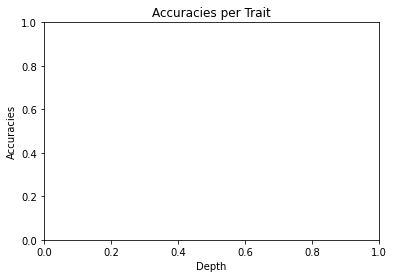

In [0]:
def main():
  #loadDataset()
   #oneLayerNN()
   #twoLayerNN()
  #regressionNN()
  DecisionTreeWrapper()

#run here
main()